In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [2]:
# Load the dataset
try:
    df = pd.read_excel('Telco_customer_churn.xlsx')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: Telco-Customer-Churn.csv not found.")
    print("Please make sure the dataset is in the same directory as the script.")
    exit()

Dataset loaded successfully.


# **--- Exploratory Data Analysis (EDA) ---**

In [3]:
print(f"The first 10 rows of data:")
display(df.head(10))

The first 10 rows of data:


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,...,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,...,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,...,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,...,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Month-to-month,No,Electronic check,30.20,30.2,Yes,1,97,2915,Competitor had better devices


In [4]:
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (7043, 33)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [6]:
print("\nNumerical Column Summary:\n")
display(df.describe())

#Null values check
df.isnull().sum()


Numerical Column Summary:



,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


In [7]:
df.groupby('Churn Label')['CustomerID'].nunique()

,CustomerID
Churn Label,
No,5174
Yes,1869


In [8]:
#Check for duplicates
print(f"Data contains {df.duplicated().sum()} duplicated.")

Data contains 0 duplicated.


In [9]:
df.groupby(['Country','State'])['CustomerID'].count()

df['City'].nunique()

fig = px.scatter_mapbox(df.groupby(['Latitude','Longitude'])['CustomerID'].count().reset_index(), lat="Latitude", lon="Longitude", hover_data= ['CustomerID'], zoom=4, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


fig = px.bar(df.groupby(['City'])['CustomerID'].count().reset_index().sort_values('CustomerID',
                                                                                    ascending=False).head(50),
             x='City',
             y='CustomerID',
             color = 'CustomerID',
             text = 'CustomerID')
fig.show()

In [10]:
fig = px.histogram(df, x="Tenure Months", color="Churn Label",marginal="box" )
fig.show()

df.groupby('Churn Label')['Tenure Months'].quantile([.50,.75,.90,.95])

df.groupby('Churn Label')['Tenure Months'].mean()

,Tenure Months
Churn Label,
No,37.569965
Yes,17.979133


In [11]:
fig = px.bar(df.groupby(['Churn Reason'])['CustomerID'].count().reset_index().sort_values('CustomerID',
                                                                                    ascending=False),
             x='Churn Reason',
             y='CustomerID',
             color = 'CustomerID',
             text = 'CustomerID')
fig.show()

In [12]:
fig = px.histogram(df, x="Churn Label", color="Contract", barmode="group",
                   title="Number of customers by contract type")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


fig = px.pie(df.groupby(['Contract','Churn Label'])['CustomerID'].count().reset_index(),
             values='CustomerID',
            names='Contract',
            facet_col = 'Churn Label',
            title = 'Churn rate by contract type')
fig.show()


df.groupby(['Contract','Churn Label'])['Tenure Months'].mean()

Contract        Churn Label
Month-to-month  No             21.033333
                Yes            14.016918
One year        No             41.674063
                Yes            44.963855
Two year        No             56.602914
                Yes            61.270833
Name: Tenure Months, dtype: float64

In [13]:
fig = px.histogram(df, x="Total Charges", color="Churn Label",
                   marginal="box"
                  )
fig.show()

In [14]:
fig = px.histogram(df, x="Monthly Charges", color="Churn Label",
                   marginal="box"
                  )
fig.show()


df.groupby('Churn Label')['Monthly Charges'].quantile([.50,.75,.95,.99])

Churn Label      
No           0.50     64.4250
             0.75     88.4000
             0.95    108.4175
             0.99    115.1000
Yes          0.50     79.6500
             0.75     94.2000
             0.95    105.6100
             0.99    111.1320
Name: Monthly Charges, dtype: float64

/tmp/ipython-input-1081925495.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-1081925495.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

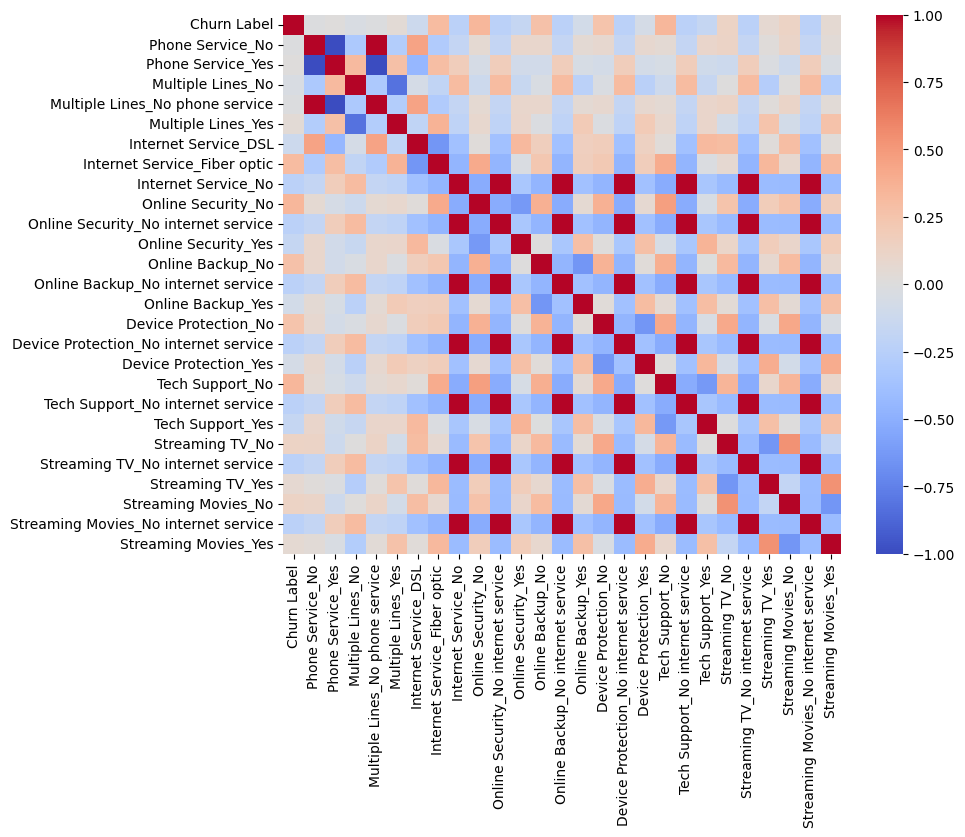

In [15]:
corr_df = df.copy()

corr_df['Churn Label'].replace(to_replace='Yes', value=1, inplace=True)
corr_df['Churn Label'].replace(to_replace='No',  value=0, inplace=True)

df_dummies = pd.get_dummies(corr_df[['Churn Label','Phone Service','Multiple Lines','Internet Service','Online Security',
                                 'Online Backup','Device Protection','Tech Support','Streaming TV',
                                 'Streaming Movies']])
df_dummies.head()

plt.figure(figsize=(9, 7))
sns.heatmap(df_dummies.corr(), annot=False, cmap='coolwarm')

plt.show()

fig = px.bar(df_dummies.corr()['Churn Label'].sort_values(ascending = False),
             color = 'value')
fig.show()

In [16]:
fig = px.pie(df.groupby(['Internet Service','Churn Label'])['CustomerID'].count().reset_index(),
             values='CustomerID',
             facet_col = 'Churn Label',
             names='Internet Service',
            title = 'What type of internet was connected to the clients who left the service?')
fig.show()

In [17]:
fig = px.bar(df.groupby(['Internet Service',
                                                'Tech Support',
                                                'Churn Label'])['CustomerID'].count().reset_index(),
             x="Internet Service",
             y="CustomerID",
             color="Churn Label",
             text = 'CustomerID',
             barmode="group",
             facet_col="Tech Support"
            )
fig.show()

In [18]:
df['Churn Label'].value_counts(normalize=True)
# 73% of NULL in Churn Reason has Churn Label of 'No'
# We will drop this column becouse a general rule is that, if more than half of the data in a column is missing, it's better to drop.

,proportion
Churn Label,
No,0.73463
Yes,0.26537


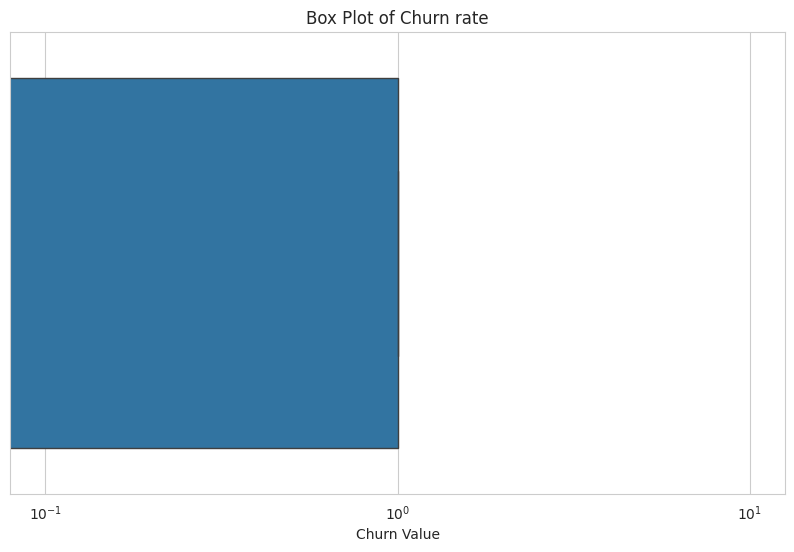

In [41]:
sns.set_style('whitegrid')


# Box Plot for checking outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Churn Value'])
plt.title('Box Plot of Churn rate')
plt.xscale('log') # Use a log scale due to the wide range of values
plt.show()


fig = px.pie(df.groupby('Churn Label')['CustomerID'].nunique().reset_index(),
             values='CustomerID',
             names='Churn Label')
fig.show()

# **--- Data Cleaning ---**

In [20]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [21]:
df['Total Charges'].fillna(df['Monthly Charges'] * df['Tenure Months'], inplace=True)

/tmp/ipython-input-3139379596.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [22]:
# 1.) Calculating charges:
df['calc_charges'] = df['Monthly Charges'] * df['Tenure Months']

# 2.) Calculating difference between Total Charges and calculated charges
df['diff_in_charges'] = df['Total Charges'] - df['calc_charges']

fig = px.histogram(df, x="diff_in_charges",color = 'Contract',marginal="box")
fig.show()

In [23]:
df.groupby('Contract')[['Total Charges','diff_in_charges']].quantile([.50,.80,.90,.95])

Total Charges  diff_in_charges
Contract                                           
Month-to-month 0.50        679.550            0.000
               0.80       2485.730           24.810
               0.90       3844.060           54.020
               0.95       4966.920           85.330
One year       0.50       2656.700            0.600
               0.80       5283.870           55.000
               0.90       6341.050           92.150
               0.95       7072.120          133.300
Two year       0.50       3593.800            0.000
               0.80       6394.440           61.180
               0.90       7452.350           97.210
               0.95       7921.315          139.005

In [24]:
df['Total Charges'] = np.where(df['Total Charges'].isna() == True,df['calc_charges'], df['Total Charges'])

In [25]:
df = df.drop(['calc_charges','diff_in_charges'], axis=1)

In [26]:
# Get the number of columns of each data type
print(f"""Number of:
    float features: {len(df.select_dtypes('float').columns)}
    int features: {len(df.select_dtypes('int').columns)}
    object features: {len(df.select_dtypes('object').columns)}
""")

Number of:
    float features: 4
    int features: 6
    object features: 23



In [27]:
data_na = (df.isnull().sum() / len(df))
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'mean of nulls' :data_na, "number of nulls" : df[data_na.index].isna().sum()})

missing_data

,mean of nulls,number of nulls
Churn Reason,0.73463,5174


In [28]:
# Define the target variable
target = 'Churn Value'

# **--- Data Pre-processing ---**

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, LabelEncoder

In [30]:
# Drop columns that are not useful for prediction or are redundant
# CustomerID is just an identifier.
# Country, State, City, Zip Code, Lat Long are location-based and might not generalize well or introduce bias.
# Latitude and Longitude are redundant with Lat Long.
# Churn Label is redundant with Churn Value.
# Churn Reason is only available for customers who have churned, so it can't be a feature for prediction.
df_clean = df.drop(columns=[
    'CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long',
    'Latitude', 'Longitude', 'Churn Label', 'Churn Score', 'CLTV', 'Churn Reason'
]).copy() # Use .copy() to avoid SettingWithCopyWarning

In [31]:
print("Data has been cleaned")
print("Old Shape of Dataframe:", df.shape)
print("New Shape of Dataframe:", df_clean.shape)

Data has been cleaned
Old Shape of Dataframe: (7043, 33)
New Shape of Dataframe: (7043, 20)


In [32]:
X = df_clean.drop(columns=[target])
y = df_clean[target]

In [33]:
df_clean.head(10)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1
5,Female,No,Yes,No,10,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,1
6,Male,Yes,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,1
7,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,1
8,Male,No,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,1
9,Male,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,1


In [ ]:
def encode_data(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
df_clean = df_clean.apply(lambda x: encode_data(x))
df_clean.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
1,0,0,0,1,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
2,0,0,0,1,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
3,0,0,1,1,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1
4,1,0,0,1,49,1,2,1,0,2,2,0,2,2,0,1,0,103.70,5036.30,1


In [34]:
df_clean.groupby('Churn Value')['Churn Value'].count()

,Churn Value
Churn Value,
0,5174
1,1869


In [35]:
# Handle Missing Values
# We'll use imputation. For numerical columns, we'll fill NaNs with the median.
# For categorical columns, we'll fill NaNs with the most frequent value.
# We will do this within a scikit-learn pipeline for robustness.

# Identify feature types(categorical and numerical features)
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

print(f"\nIdentified {len(numerical_features)} numerical features: {numerical_features}")
print(f"Identified {len(categorical_features)} categorical features: {categorical_features}")


Identified 3 numerical features: ['Tenure Months', 'Monthly Charges', 'Total Charges']
Identified 16 categorical features: ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']


In [36]:
# Scale Numerical Features and Encode Categorical Features

# Create preprocessing pipelines for both numerical and categorical data.
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Handle missing numerical values
    ('scaler', StandardScaler()) # Scale data
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Handle missing categorical values
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # One-hot encode data
])

In [37]:
# Create a preprocessor object using ColumnTransformer
# This applies different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns (if any), though we've handled all of them
)

In [38]:
# --- 4. Split Data into Training and Test Sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42, # for reproducibility
    stratify=y # Ensures the proportion of churners is the same in train and test sets
)

In [39]:
# --- Apply the Preprocessing ---
# Now, we fit the preprocessor on the training data and transform both training and test data.
# This prevents data leakage from the test set into the training process.

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("\n--- Preprocessing Complete ---")
print("Data has been cleaned, scaled, encoded, and split.")
print("Shape of processed training data (X_train_processed):", X_train_processed.shape)
print("Shape of processed test data (X_test_processed):", X_test_processed.shape)
print("-" * 40)


--- Preprocessing Complete ---
Data has been cleaned, scaled, encoded, and split.
Shape of processed training data (X_train_processed): (4930, 46)
Shape of processed test data (X_test_processed): (2113, 46)
----------------------------------------


# **--- MODEL TRAINING AND EVALUATION ---**

In [46]:
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    precision_recall_curve,
    auc
)

In [43]:
def evaluate_model_without_cv(name, model, x_train, y_train, x_test, y_test):
    """
    Train and evaluate model WITHOUT cross-validation
    Uses default hyperparameters, simple train-test split
    """
    print(f"\n{'='*60}")
    print(f"--- {name} (WITHOUT Cross-Validation) ---")
    print(f"{'='*60}")

    # Train model
    start_time = time.time()
    model.fit(x_train, y_train)
    end_time = time.time()
    total_time = end_time - start_time

    # Make predictions
    y_pred = model.predict(x_test)

    # Handle probability predictions
    if hasattr(model, 'predict_proba'):
        y_scores = model.predict_proba(x_test)[:, 1]
    else:
        y_scores = model.decision_function(x_test)

    # Calculate confusion matrix
    c_matrix = confusion_matrix(y_test, y_pred)
    percentages = (c_matrix / np.sum(c_matrix, axis=1)[:, np.newaxis]).round(2) * 100
    labels = [[f"{c_matrix[i, j]}\n({percentages[i, j]:.1f}%)"
               for j in range(c_matrix.shape[1])]
              for i in range(c_matrix.shape[0])]
    labels = np.asarray(labels)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix - {name} (No CV)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_scores)
    precision_curve_vals, recall_curve_vals, _ = precision_recall_curve(y_test, y_scores)
    pr_auc = auc(recall_curve_vals, precision_curve_vals)

    # Print results
    print(f"\nTraining completed in {total_time:.2f} seconds")
    print(f"Using default hyperparameters: {model.get_params()}")

    print(f"\nConfusion Matrix:")
    print(f"  TN: {c_matrix[0][0]:4d} | FP: {c_matrix[0][1]:4d}")
    print(f"  FN: {c_matrix[1][0]:4d} | TP: {c_matrix[1][1]:4d}")

    print(f"\nPerformance Metrics:")
    print(f"  Accuracy:  {accuracy:.4f} ({accuracy:.2%})")
    print(f"  Precision: {precision:.4f} ({precision:.2%})")
    print(f"  Recall:    {recall:.4f} ({recall:.2%})")
    print(f"  F1-Score:  {f1:.4f} ({f1:.2%})")
    print(f"  ROC-AUC:   {roc_auc:.4f} ({roc_auc:.2%})")
    print(f"  PR-AUC:    {pr_auc:.4f} ({pr_auc:.2%})")

    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return {
        "Model": name,
        "CV": "No",
        "Time (s)": total_time,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc,
        "PR-AUC": pr_auc,
        "Hyperparameters": "Default"
    }

In [44]:
def evaluate_model_with_cv(name, base_model, param_grid, x_train, y_train, x_test, y_test):
    """
    Train and evaluate model WITH cross-validation
    Uses GridSearchCV for hyperparameter tuning with 5-fold CV
    """
    print(f"\n{'='*60}")
    print(f"--- {name} (WITH Cross-Validation) ---")
    print(f"{'='*60}")

    # Set up GridSearchCV with cross-validation
    grid_search = GridSearchCV(
        estimator=base_model,
        param_grid=param_grid,
        cv=5,  # 5-fold cross-validation
        scoring='f1',
        n_jobs=-1,
        verbose=0
    )

    # Train with timing
    start_time = time.time()
    grid_search.fit(x_train, y_train)
    end_time = time.time()
    total_time = end_time - start_time

    # Get best model
    best_model = grid_search.best_estimator_

    # Get cross-validation scores during training
    cv_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='f1')

    # Make predictions on test set
    y_pred = best_model.predict(x_test)

    # Handle probability predictions
    if hasattr(best_model, 'predict_proba'):
        y_scores = best_model.predict_proba(x_test)[:, 1]
    else:
        y_scores = best_model.decision_function(x_test)

    # Calculate confusion matrix
    c_matrix = confusion_matrix(y_test, y_pred)
    percentages = (c_matrix / np.sum(c_matrix, axis=1)[:, np.newaxis]).round(2) * 100
    labels = [[f"{c_matrix[i, j]}\n({percentages[i, j]:.1f}%)"
               for j in range(c_matrix.shape[1])]
              for i in range(c_matrix.shape[0])]
    labels = np.asarray(labels)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Greens',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix - {name} (With CV)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_scores)
    precision_curve_vals, recall_curve_vals, _ = precision_recall_curve(y_test, y_scores)
    pr_auc = auc(recall_curve_vals, precision_curve_vals)

    # Print results
    print(f"\nTraining completed in {total_time:.2f} seconds")
    print(f"\nBest Parameters Found: {grid_search.best_params_}")
    print(f"Cross-Validation F1 Scores: {cv_scores}")
    print(f"Mean CV F1-Score: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

    print(f"\nConfusion Matrix:")
    print(f"  TN: {c_matrix[0][0]:4d} | FP: {c_matrix[0][1]:4d}")
    print(f"  FN: {c_matrix[1][0]:4d} | TP: {c_matrix[1][1]:4d}")

    print(f"\nPerformance Metrics on Test Set:")
    print(f"  Accuracy:  {accuracy:.4f} ({accuracy:.2%})")
    print(f"  Precision: {precision:.4f} ({precision:.2%})")
    print(f"  Recall:    {recall:.4f} ({recall:.2%})")
    print(f"  F1-Score:  {f1:.4f} ({f1:.2%})")
    print(f"  ROC-AUC:   {roc_auc:.4f} ({roc_auc:.2%})")
    print(f"  PR-AUC:    {pr_auc:.4f} ({pr_auc:.2%})")

    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return {
        "Model": name,
        "CV": "Yes (5-fold)",
        "Time (s)": total_time,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc,
        "PR-AUC": pr_auc,
        "Hyperparameters": str(grid_search.best_params_),
        "CV Mean F1": cv_scores.mean(),
        "CV Std F1": cv_scores.std()
    }

In [ ]:
# Define models with default parameters (for WITHOUT CV)
models_no_cv = {
    "Logistic Regression (Linear)": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42, probability=True),
    "Naive Bayes": BernoulliNB(),
    "KNN": KNeighborsClassifier()
}

# Define models and parameter grids (for WITH CV)
models_with_cv = {
    "Logistic Regression": {
        "model": LogisticRegression(random_state=42, max_iter=1000),
        "params": {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            'max_depth': [None, 3, 5, 7, 9, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['gini', 'entropy']
        }
    },
    "SVM": {
        "model": SVC(random_state=42, probability=True),
        "params": {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    "Naive Bayes": {
        "model": BernoulliNB(),
        "params": {
            'alpha': [0.001, 0.01, 0.1, 1, 10]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    }
}


################################################################################
### PART 1: EVALUATION WITHOUT CROSS-VALIDATION ###
################################################################################

--- Logistic Regression (WITHOUT Cross-Validation) ---


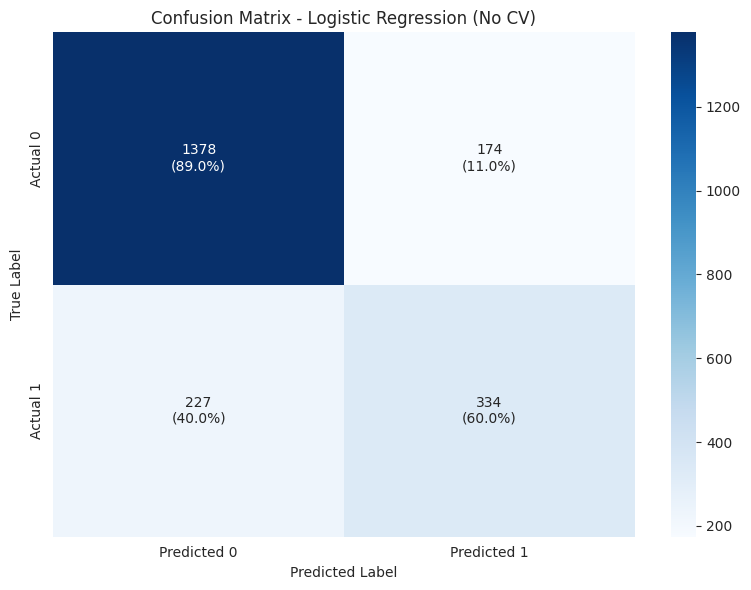


Training completed in 0.03 seconds
Using default hyperparameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Confusion Matrix:
  TN: 1378 | FP:  174
  FN:  227 | TP:  334

Performance Metrics:
  Accuracy:  0.8102 (81.02%)
  Precision: 0.6575 (65.75%)
  Recall:    0.5954 (59.54%)
  F1-Score:  0.6249 (62.49%)
  ROC-AUC:   0.8535 (85.35%)
  PR-AUC:    0.6556 (65.56%)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1552
           1       0.66      0.60      0.62       561

    accuracy                           0.81      2113
   macro avg       0.76      0.74      0.75      2113
weighted avg       0.81      0.81      0.81      2113


--- Decision Tree (WITHOUT Cross-Validat

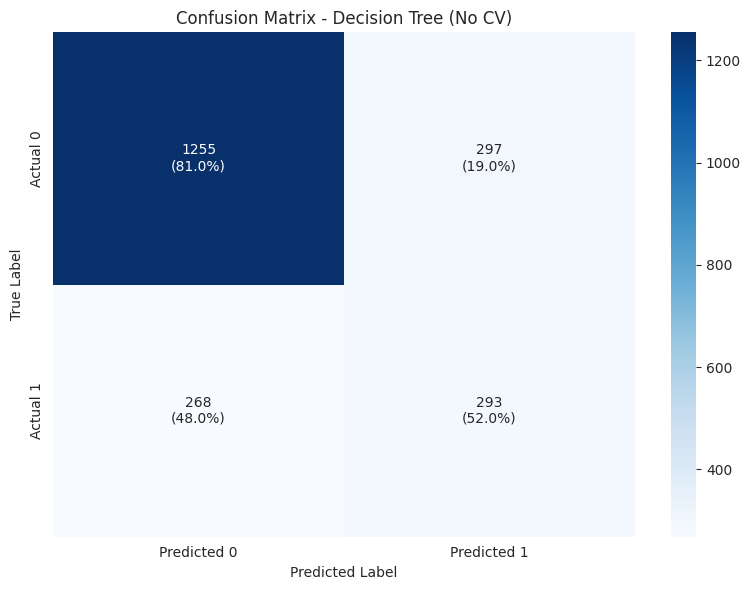


Training completed in 0.04 seconds
Using default hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}

Confusion Matrix:
  TN: 1255 | FP:  297
  FN:  268 | TP:  293

Performance Metrics:
  Accuracy:  0.7326 (73.26%)
  Precision: 0.4966 (49.66%)
  Recall:    0.5223 (52.23%)
  F1-Score:  0.5091 (50.91%)
  ROC-AUC:   0.6657 (66.57%)
  PR-AUC:    0.5727 (57.27%)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1552
           1       0.50      0.52      0.51       561

    accuracy                           0.73      2113
   macro avg       0.66      0.67      0.66      2113
weighted avg       0.74      0.73      0.73      2113


--- SVM (WITHOUT Cross

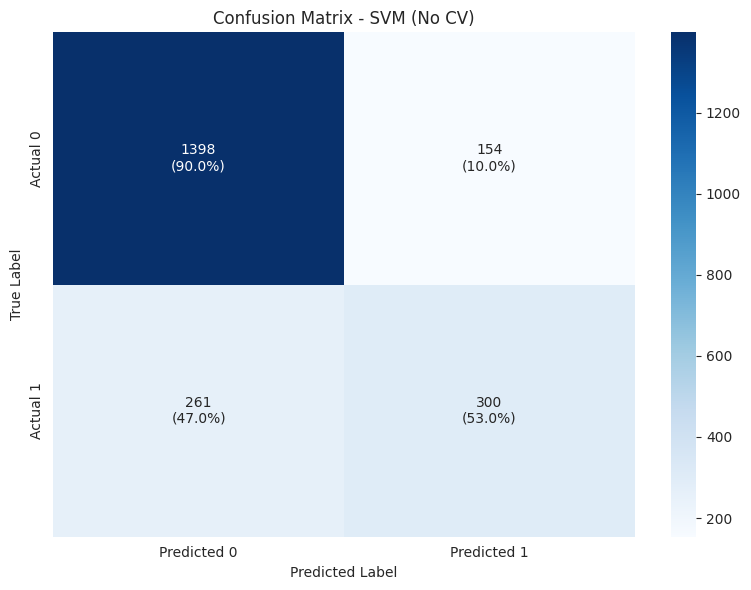


Training completed in 5.27 seconds
Using default hyperparameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Confusion Matrix:
  TN: 1398 | FP:  154
  FN:  261 | TP:  300

Performance Metrics:
  Accuracy:  0.8036 (80.36%)
  Precision: 0.6608 (66.08%)
  Recall:    0.5348 (53.48%)
  F1-Score:  0.5911 (59.11%)
  ROC-AUC:   0.8198 (81.98%)
  PR-AUC:    0.6358 (63.58%)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1552
           1       0.66      0.53      0.59       561

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113


--- Naive Bayes (WITHOUT Cross-Validation) --

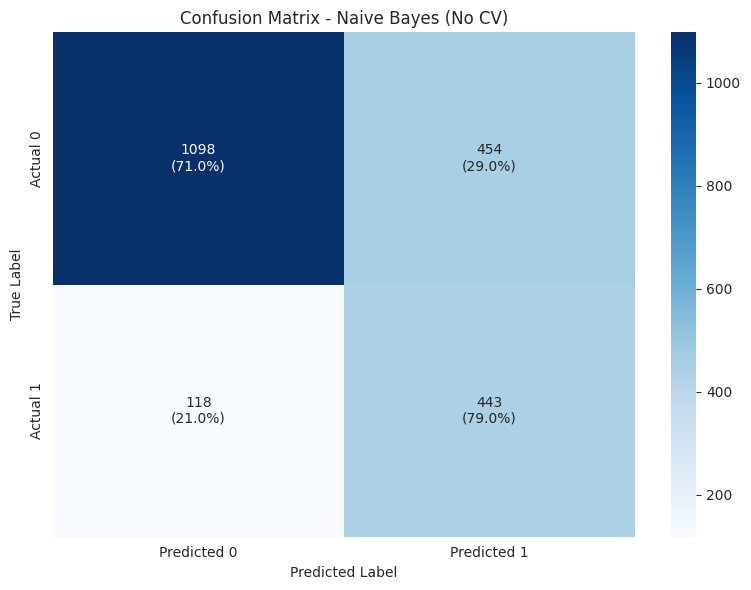


Training completed in 0.01 seconds
Using default hyperparameters: {'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}

Confusion Matrix:
  TN: 1098 | FP:  454
  FN:  118 | TP:  443

Performance Metrics:
  Accuracy:  0.7293 (72.93%)
  Precision: 0.4939 (49.39%)
  Recall:    0.7897 (78.97%)
  F1-Score:  0.6077 (60.77%)
  ROC-AUC:   0.8171 (81.71%)
  PR-AUC:    0.6064 (60.64%)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1552
           1       0.49      0.79      0.61       561

    accuracy                           0.73      2113
   macro avg       0.70      0.75      0.70      2113
weighted avg       0.79      0.73      0.74      2113


--- KNN (WITHOUT Cross-Validation) ---


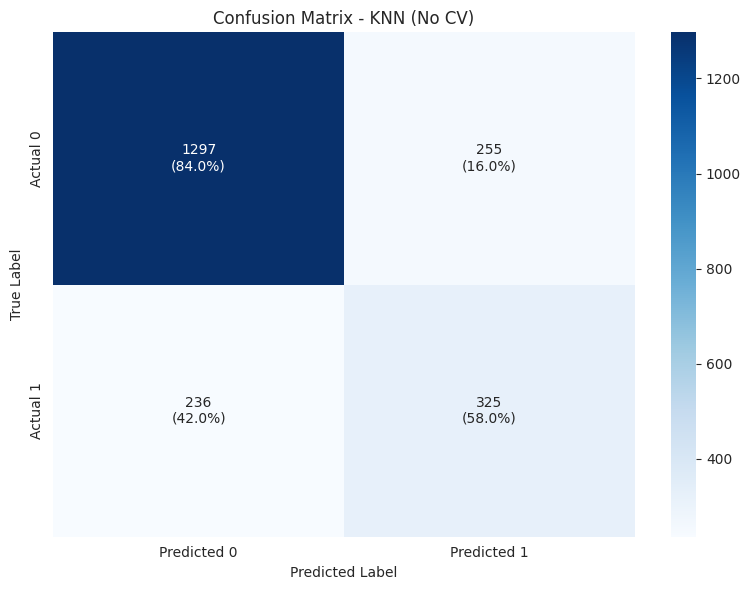


Training completed in 0.00 seconds
Using default hyperparameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

Confusion Matrix:
  TN: 1297 | FP:  255
  FN:  236 | TP:  325

Performance Metrics:
  Accuracy:  0.7676 (76.76%)
  Precision: 0.5603 (56.03%)
  Recall:    0.5793 (57.93%)
  F1-Score:  0.5697 (56.97%)
  ROC-AUC:   0.7954 (79.54%)
  PR-AUC:    0.5730 (57.30%)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1552
           1       0.56      0.58      0.57       561

    accuracy                           0.77      2113
   macro avg       0.70      0.71      0.71      2113
weighted avg       0.77      0.77      0.77      2113


################################################################################
### PART 2: EVALUATION WITH CROSS-VALIDATION ###
###########################################

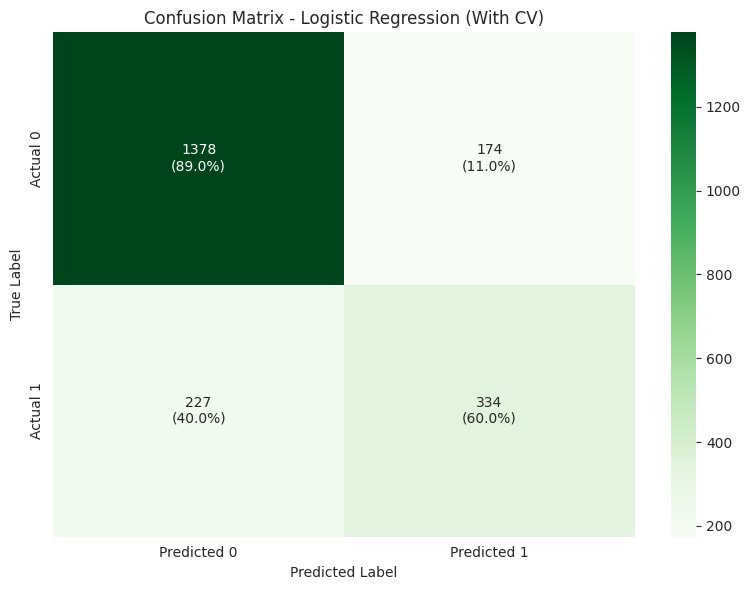


Training completed in 5.95 seconds

Best Parameters Found: {'C': 1, 'solver': 'liblinear'}
Cross-Validation F1 Scores: [0.61349693 0.67351129 0.64503043 0.59081836 0.59109312]
Mean CV F1-Score: 0.6228 (+/- 0.0322)

Confusion Matrix:
  TN: 1378 | FP:  174
  FN:  227 | TP:  334

Performance Metrics on Test Set:
  Accuracy:  0.8102 (81.02%)
  Precision: 0.6575 (65.75%)
  Recall:    0.5954 (59.54%)
  F1-Score:  0.6249 (62.49%)
  ROC-AUC:   0.8535 (85.35%)
  PR-AUC:    0.6557 (65.57%)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1552
           1       0.66      0.60      0.62       561

    accuracy                           0.81      2113
   macro avg       0.76      0.74      0.75      2113
weighted avg       0.81      0.81      0.81      2113


--- Decision Tree (WITH Cross-Validation) ---


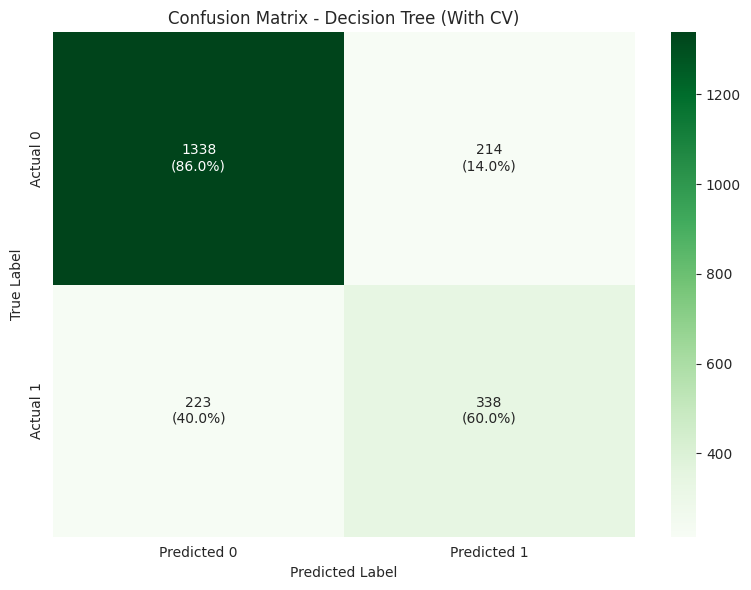


Training completed in 18.41 seconds

Best Parameters Found: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Cross-Validation F1 Scores: [0.6536965  0.61143984 0.57684211 0.55360624 0.57839721]
Mean CV F1-Score: 0.5948 (+/- 0.0347)

Confusion Matrix:
  TN: 1338 | FP:  214
  FN:  223 | TP:  338

Performance Metrics on Test Set:
  Accuracy:  0.7932 (79.32%)
  Precision: 0.6123 (61.23%)
  Recall:    0.6025 (60.25%)
  F1-Score:  0.6074 (60.74%)
  ROC-AUC:   0.8402 (84.02%)
  PR-AUC:    0.6551 (65.51%)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1552
           1       0.61      0.60      0.61       561

    accuracy                           0.79      2113
   macro avg       0.73      0.73      0.73      2113
weighted avg       0.79      0.79      0.79      2113


--- SVM (WITH Cross-Validation) ---


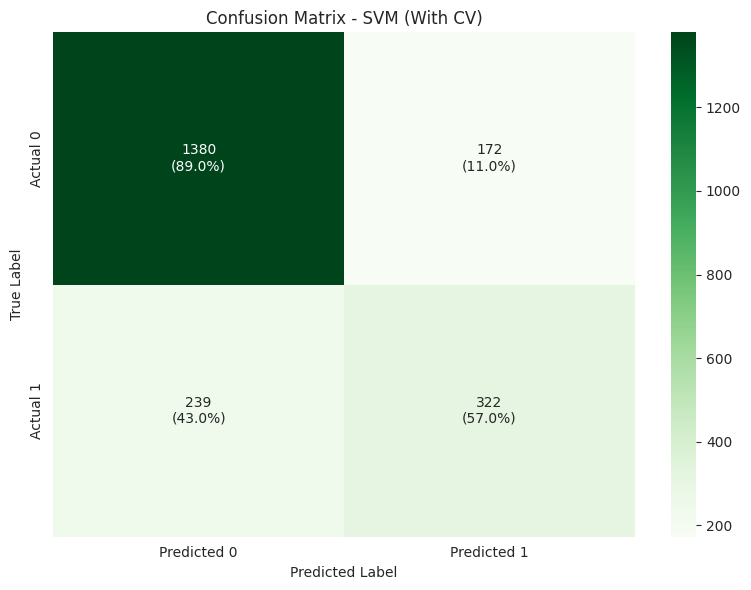


Training completed in 230.82 seconds

Best Parameters Found: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Cross-Validation F1 Scores: [0.6185567  0.65432099 0.61795407 0.58655804 0.57373737]
Mean CV F1-Score: 0.6102 (+/- 0.0282)

Confusion Matrix:
  TN: 1380 | FP:  172
  FN:  239 | TP:  322

Performance Metrics on Test Set:
  Accuracy:  0.8055 (80.55%)
  Precision: 0.6518 (65.18%)
  Recall:    0.5740 (57.40%)
  F1-Score:  0.6104 (61.04%)
  ROC-AUC:   0.8493 (84.93%)
  PR-AUC:    0.6500 (65.00%)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1552
           1       0.65      0.57      0.61       561

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113


--- Naive Bayes (WITH Cross-Validation) ---


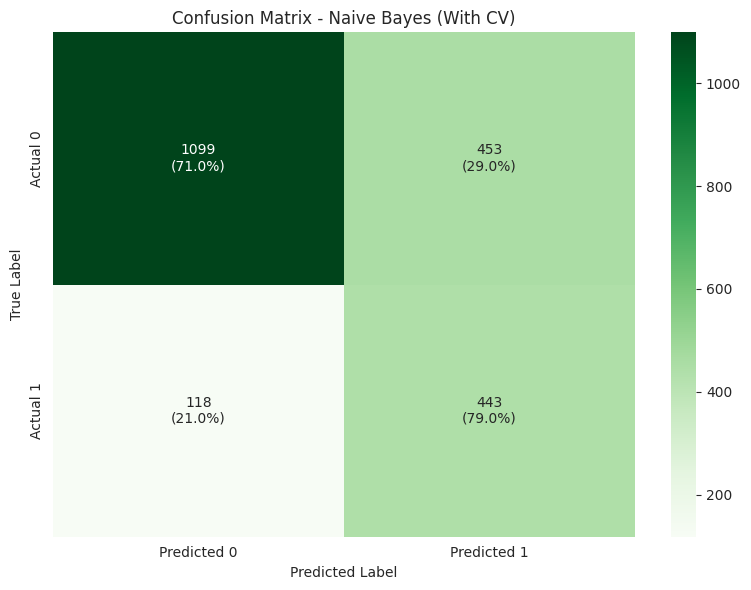


Training completed in 0.47 seconds

Best Parameters Found: {'alpha': 0.001}
Cross-Validation F1 Scores: [0.65217391 0.63962559 0.62968516 0.60658083 0.61452514]
Mean CV F1-Score: 0.6285 (+/- 0.0165)

Confusion Matrix:
  TN: 1099 | FP:  453
  FN:  118 | TP:  443

Performance Metrics on Test Set:
  Accuracy:  0.7298 (72.98%)
  Precision: 0.4944 (49.44%)
  Recall:    0.7897 (78.97%)
  F1-Score:  0.6081 (60.81%)
  ROC-AUC:   0.8170 (81.70%)
  PR-AUC:    0.6063 (60.63%)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1552
           1       0.49      0.79      0.61       561

    accuracy                           0.73      2113
   macro avg       0.70      0.75      0.70      2113
weighted avg       0.79      0.73      0.74      2113


--- KNN (WITH Cross-Validation) ---


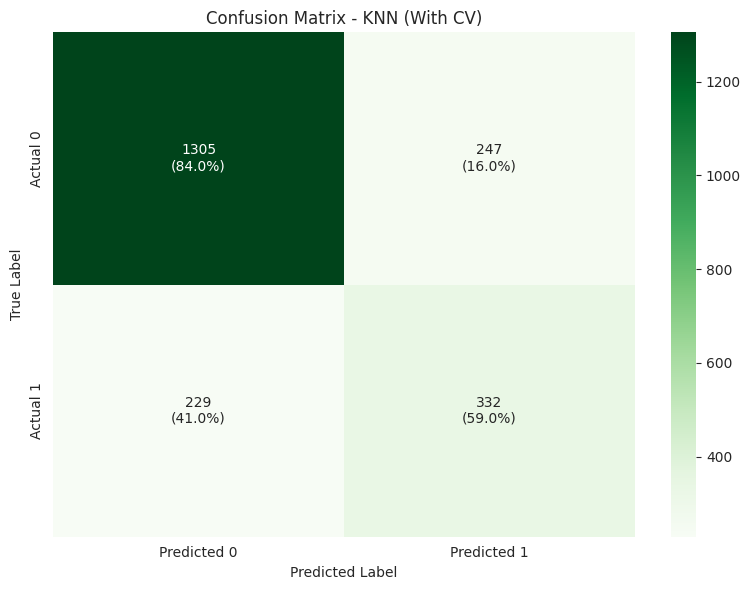


Training completed in 8.64 seconds

Best Parameters Found: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Cross-Validation F1 Scores: [0.621881   0.59481038 0.60311284 0.59923664 0.55430712]
Mean CV F1-Score: 0.5947 (+/- 0.0222)

Confusion Matrix:
  TN: 1305 | FP:  247
  FN:  229 | TP:  332

Performance Metrics on Test Set:
  Accuracy:  0.7747 (77.47%)
  Precision: 0.5734 (57.34%)
  Recall:    0.5918 (59.18%)
  F1-Score:  0.5825 (58.25%)
  ROC-AUC:   0.8100 (81.00%)
  PR-AUC:    0.5829 (58.29%)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1552
           1       0.57      0.59      0.58       561

    accuracy                           0.77      2113
   macro avg       0.71      0.72      0.71      2113
weighted avg       0.78      0.77      0.78      2113



In [ ]:
# Store all results
results_list = []

print("\n" + "#"*80)
print("### PART 1: EVALUATION WITHOUT CROSS-VALIDATION ###")
print("#"*80)

# Evaluate WITHOUT cross-validation
for name, model in models_no_cv.items():
    result = evaluate_model_without_cv(name, model, X_train_processed, y_train, X_test_processed, y_test)
    results_list.append(result)

print("\n" + "#"*80)
print("### PART 2: EVALUATION WITH CROSS-VALIDATION ###")
print("#"*80)

# Evaluate WITH cross-validation
for name, config in models_with_cv.items():
    result = evaluate_model_with_cv(
        name=name,
        base_model=config["model"],
        param_grid=config["params"],
        x_train=X_train_processed,
        y_train=y_train,
        x_test=X_test_processed,
        y_test=y_test
    )
    results_list.append(result)

In [ ]:
# Create comprehensive comparison
print("\n" + "="*80)
print("### FINAL COMPARISON: WITH vs WITHOUT CROSS-VALIDATION ###")
print("="*80 + "\n")

results_df = pd.DataFrame(results_list)

# Display results grouped by model
for model_name in models_no_cv.keys():
    print(f"\n{model_name}:")
    model_results = results_df[results_df['Model'] == model_name]
    display_cols = ['CV', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'PR-AUC', 'Time (s)']
    print(model_results[display_cols].to_string(index=False))
    print("-" * 80)

# Summary statistics
print("\n" + "="*80)
print("### SUMMARY: AVERAGE PERFORMANCE BY APPROACH ###")
print("="*80)
summary = results_df.groupby('CV')[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'Time (s)']].mean()
print(summary.round(4))

# Best parameters found for each model
print("\n" + "="*80)
print("### BEST HYPERPARAMETERS FOUND (WITH CROSS-VALIDATION) ###")
print("="*80)

cv_results = results_df[results_df['CV'] == 'Yes (5-fold)'].sort_values(by='F1-Score', ascending=False)
for _, row in cv_results.iterrows():
    print(f"\n{row['Model']}:")
    print(f"  F1-Score: {row['F1-Score']:.4f}")
    print(f"  Best Parameters: {row['Hyperparameters']}")
    if 'CV Mean F1' in row:
        print(f"  CV Mean F1: {row['CV Mean F1']:.4f} (+/- {row['CV Std F1']:.4f})")

# Best models
print("\n" + "="*80)
print("### BEST MODELS ###")
print("="*80)
best_no_cv = results_df[results_df['CV'] == 'No'].nlargest(1, 'F1-Score').iloc[0]
best_with_cv = results_df[results_df['CV'] == 'Yes (5-fold)'].nlargest(1, 'F1-Score').iloc[0]

print(f"\nBest WITHOUT CV: {best_no_cv['Model']} (F1-Score: {best_no_cv['F1-Score']:.4f})")
print(f"Best WITH CV:    {best_with_cv['Model']} (F1-Score: {best_with_cv['F1-Score']:.4f})")
print(f"  Parameters: {best_with_cv['Hyperparameters']}")
print(f"\nImprovement with CV: {(best_with_cv['F1-Score'] - best_no_cv['F1-Score']):.4f}")
print("="*80)


### FINAL COMPARISON: WITH vs WITHOUT CROSS-VALIDATION ###


Logistic Regression:
          CV  Accuracy  Precision   Recall  F1-Score  ROC-AUC   PR-AUC  Time (s)
          No  0.810222    0.65748 0.595365  0.624883 0.853516 0.655586  0.034889
Yes (5-fold)  0.810222    0.65748 0.595365  0.624883 0.853500 0.655746  5.953991
--------------------------------------------------------------------------------

Decision Tree:
          CV  Accuracy  Precision   Recall  F1-Score  ROC-AUC   PR-AUC  Time (s)
          No  0.732608   0.496610 0.522282  0.509123 0.665717 0.572672  0.041537
Yes (5-fold)  0.793185   0.612319 0.602496  0.607367 0.840219 0.655068 18.408993
--------------------------------------------------------------------------------

SVM:
          CV  Accuracy  Precision   Recall  F1-Score  ROC-AUC   PR-AUC   Time (s)
          No  0.803597   0.660793 0.534759  0.591133 0.819756 0.635809   5.265711
Yes (5-fold)  0.805490   0.651822 0.573975  0.610427 0.849270 0.649972 230.816200
-